In [1]:
import mne
import numpy
import matplotlib.pyplot as plt

In [2]:
edf_file_rest='/Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject00_1.edf'
edf_file_stress='/Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject00_2.edf'
raw_rest = mne.io.read_raw_edf(edf_file_rest, preload=True)
raw_stress = mne.io.read_raw_edf(edf_file_stress, preload=True)

Extracting EDF parameters from /Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/var/folders/63/jdvgt18d2h951k88nbrbz_bh0000gn/T/ipykernel_11049/1988198146.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  x_rest=raw_rest.compute_psd(fmax=100).plot(picks='data', exclude="bads", amplitude=False)
/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/var/folders/63/jdvgt18d2h951k88nbrbz_bh0000gn/T/ipykernel_11049/1988198146.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  x_stress=raw_stress.compute_psd(fmax=100).plot(picks='data', exclude="bads", amplitude=False)
/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (f

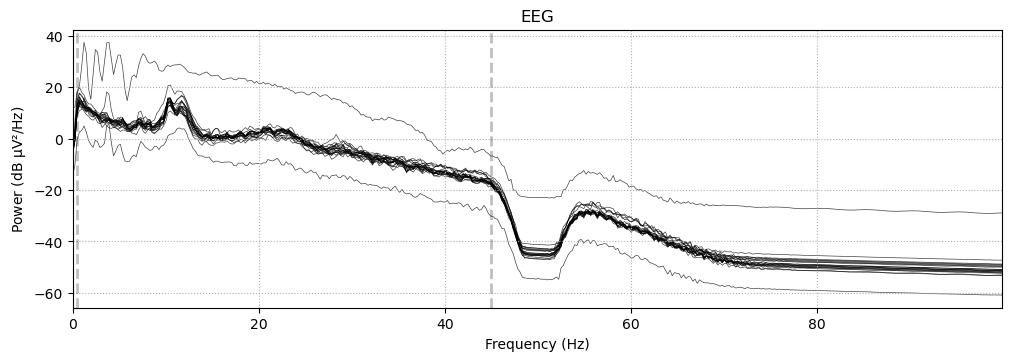

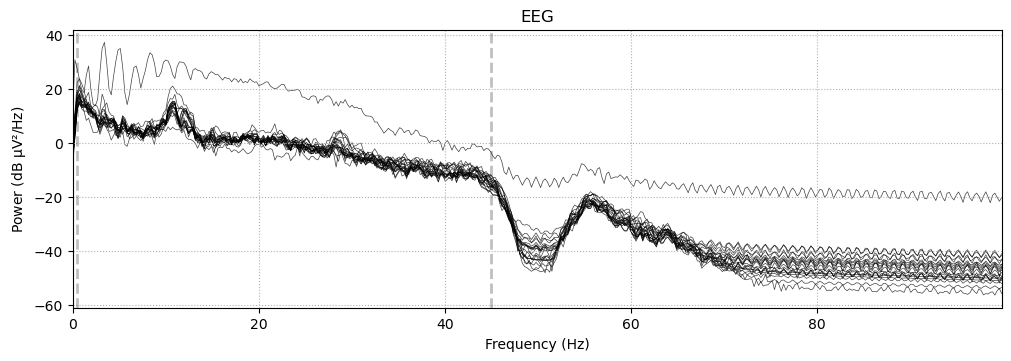

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# psds, freqs = mne.time_frequency.psd_welch(raw, picks=picks, fmin=2, fmax=40, tmin=0, tmax=raw.times[-1], n_fft=2048)
# psds = 10 * np.log10(psds)
x_rest=raw_rest.compute_psd(fmax=100).plot(picks='data', exclude="bads", amplitude=False)
x_stress=raw_stress.compute_psd(fmax=100).plot(picks='data', exclude="bads", amplitude=False)
plt.show()

In [13]:
x_rest_data=raw_rest.compute_psd(fmax=100)
x_rest_data.get_data().shape

Effective window size : 4.096 (s)


(21, 410)

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


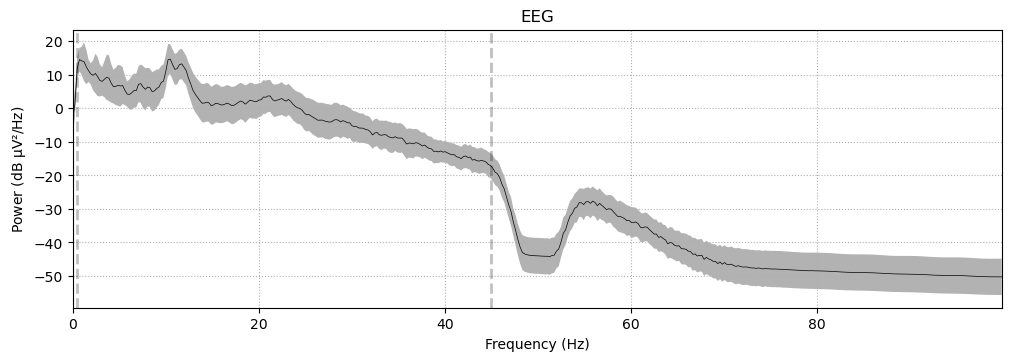

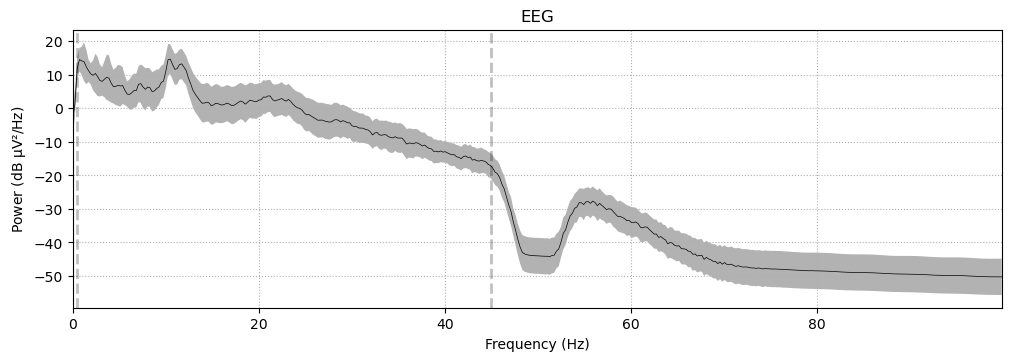

In [7]:
fig = raw_rest.compute_psd(tmax=np.inf, fmax=100).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(
            x=freqs[idx],
            y=psds[idx] + 18,
            dx=0,
            dy=-12,
            color="red",
            width=0.1,
            head_width=3,
            length_includes_head=True,
        )

plt.show()

In [15]:

epochs = mne.make_fixed_length_epochs(raw_rest, duration=3, overlap=1, preload=False)

Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated


In [18]:
epochs.get_data().shape

Using data from preloaded Raw for 90 events and 1500 original time points ...


(90, 21, 1500)

In [26]:
x_rest_epoch=epochs.compute_psd(fmin=1,fmax=4,method="welch",picks='data')

Using data from preloaded Raw for 90 events and 1500 original time points ...
Effective window size : 3.000 (s)


In [28]:
x_rest_epoch.get_data().shape

(90, 21, 10)

In [29]:
all_edf_file_path='/Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files'

In [32]:
import os
rest_files = []
stress_files = []

# Iterate through the folder to collect file paths
for file_name in os.listdir(all_edf_file_path):
    if file_name.endswith('_1.edf'):
        rest_files.append(os.path.join(all_edf_file_path, file_name))
    elif file_name.endswith('_2.edf'):
        stress_files.append(os.path.join(all_edf_file_path, file_name))

In [34]:
print(f"\nNumber of rest files: {len(rest_files)}")
print(f"Number of stress files: {len(stress_files)}")


Number of rest files: 36
Number of stress files: 36


In [192]:
def read_raw_data(file_path):
    raw_data=mne.io.read_raw_edf(file_path, preload=True)
    raw_array=raw_data.get_data()
    return raw_array    

In [193]:
all_rest_raw_array=[read_raw_data(i) for i in rest_files]
all_stress_raw_array=[read_raw_data(i) for i in stress_files]

Extracting EDF parameters from /Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject20_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject04_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 84999  =      0.000 ...   169.998 secs...
Extracting EDF parameters from /Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject22_1.edf...
EDF file detected
Setting channel info structure...

In [194]:
all_rest_raw_array[0].shape

(21, 91000)

In [35]:
def read_data(file_path):
    raw_data=mne.io.read_raw_edf(file_path, preload=True)
    epochs = mne.make_fixed_length_epochs(raw_data, duration=2, overlap=1, preload=False)
    epoch_array=epochs.get_data()
    return epoch_array
    

In [89]:
all_rest_edf_array=[read_data(i) for i in rest_files]
all_stress_edf_array=[read_data(i) for i in stress_files]

Extracting EDF parameters from /Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject20_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Not setting metadata
181 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 181 events and 1000 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject04_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 84999  =      0.000 ...   169.998 secs...
Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 169 events and 1000 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/shiv

In [99]:
all_rest_edf_array[0].shape

(181, 21, 1000)

In [91]:
def read_psd_array(file_path , bands):
    raw_data=mne.io.read_raw_edf(file_path, preload=True)
    epochs = mne.make_fixed_length_epochs(raw_data, duration=2, overlap=1, preload=False)
    for fmin, fmax in bands:
        psd = epochs.compute_psd(fmin=fmin, fmax=fmax, method='welch')
        psd_array=psd.get_data()
    return psd_array  

In [92]:
bands = [(1, 4), (4, 8), (8, 12), (12, 30), (30, 100)]  # Delta, Theta, Alpha, Beta, Gamma

all_rest_psd_array=[read_psd_array(i,bands) for i in rest_files]
all_stress_psd_array=[read_psd_array(i,bands) for i in stress_files]

Extracting EDF parameters from /Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject20_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Not setting metadata
181 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 181 events and 1000 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Using data from preloaded Raw for 181 events and 1000 original time points ...
Effective window size : 2.000 (s)
Using data from preloaded Raw for 181 events and 1000 original time points ...
Effective window size : 2.000 (s)
Using data from preloaded Raw for 181 events and 1000 original time points ...
Effective window size : 2.000 (s)
Using data from preloaded Raw for 181 events and 1000 original time points ...
Effective window size : 2.000 (s)
Extracting EDF parameters from /Use

In [101]:
rest_labels=[len(i)*[0] for i in all_rest_psd_array]
stress_labels=[len(i)*[1] for i in all_stress_psd_array]
print(len(rest_labels),len(stress_labels))

36 36


In [184]:
all_psd_data=all_rest_psd_array + all_stress_psd_array
labeled_data=rest_labels + stress_labels
all_psd_data[0].shape

(181, 21, 141)

In [109]:
group_list=[[i]*len(j) for i,j in enumerate(all_psd_data)]
len(group_list)

72

In [200]:
psd_data_arr=np.vstack(all_psd_data)
label_arr=np.hstack(labeled_data)
group_arr=np.hstack(group_list)
print(psd_data_arr.shape,label_arr.shape,group_arr.shape)


(8604, 21, 141) (8604,) (8604,)


In [201]:
import keras
from sklearn.model_selection import train_test_split
import EEGModels

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
n_samples, n_channels, n_times = psd_data_arr.shape
psd_data_arr = psd_data_arr.reshape(n_samples, -1)
data_array = scaler.fit_transform()
data_array = data_array.reshape(n_samples, n_channels, n_times)


psd_data_arr = psd_data_arr[..., np.newaxis]  # Shape: (8604, 21, 141, 1)
X_train, X_test, y_train, y_test = train_test_split(psd_data_arr, label_arr, test_size=0.2, random_state=42)


In [203]:
X_train.shape

(6883, 21, 141)

In [182]:
model = EEGModels.EEGNet(nb_classes=2, Chans=21, Samples=141, dropoutRate=0.5)  # nb_classes is 2 for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [181]:
history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_data=(X_test, y_test), verbose=2)


InvalidArgumentError: Graph execution error:

Detected at node 'model_2/average_pooling2d_4/AvgPool' defined at (most recent call last):
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/asyncio/base_events.py", line 595, in run_forever
      self._run_once()
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/asyncio/base_events.py", line 1881, in _run_once
      handle._run()
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/63/jdvgt18d2h951k88nbrbz_bh0000gn/T/ipykernel_11049/3176023383.py", line 1, in <module>
      history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_data=(X_test, y_test), verbose=2)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/keras/layers/pooling/base_pooling2d.py", line 84, in call
      outputs = self.pool_function(
Node: 'model_2/average_pooling2d_4/AvgPool'
Default AvgPoolingOp only supports NHWC on device type CPU
	 [[{{node model_2/average_pooling2d_4/AvgPool}}]] [Op:__inference_train_function_3178]